In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import nltk
from nltk.corpus import stopwords

In [2]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [3]:
print(len(messages))

5574


In [4]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [5]:
messages = pd.read_csv('SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages.head()

label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [6]:
messages.describe()

label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30

In [7]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [8]:
messages['length'] = messages['message'].apply(len)
messages.head()

label                                            message  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61

In [9]:
import seaborn as sns

%matplotlib inline

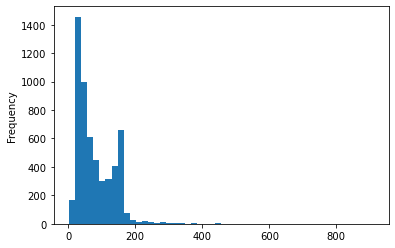

In [10]:
messages['length'].plot(bins=50, kind='hist')

In [11]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [12]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000212657DE348>,
      dtype=object)

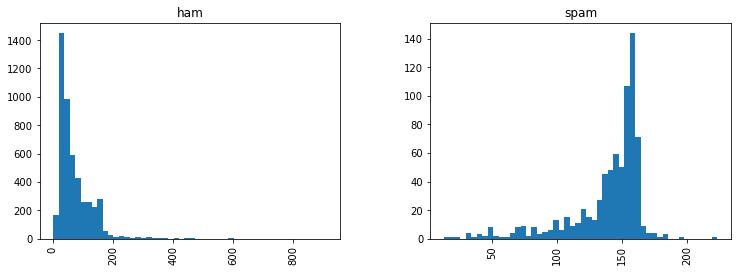

In [13]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

In [14]:
import string
def text_process(mess):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [15]:
messages['message'].head(5).apply(text_process) #checking the function

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Print total number of vocab words
print(bow_transformer.vocabulary_)

{'Go': 2060, 'jurong': 7555, 'point': 8917, 'crazy': 5769, 'Available': 1110, 'bugis': 5218, 'n': 8336, 'great': 6937, 'world': 11163, 'la': 7668, 'e': 6217, 'buffet': 5217, 'Cine': 1483, 'got': 6906, 'amore': 4653, 'wat': 10965, 'Ok': 3064, 'lar': 7701, 'Joking': 2451, 'wif': 11072, 'u': 10698, 'oni': 8590, 'Free': 1941, 'entry': 6331, '2': 423, 'wkly': 11123, 'comp': 5619, 'win': 11084, 'FA': 1833, 'Cup': 1551, 'final': 6557, 'tkts': 10512, '21st': 443, 'May': 2804, '2005': 430, 'Text': 3953, '87121': 871, 'receive': 9252, 'questionstd': 9159, 'txt': 10686, 'rateTCs': 9200, 'apply': 4731, '08452810075over18s': 73, 'U': 4068, 'dun': 6204, 'say': 9554, 'early': 6222, 'hor': 7186, 'c': 5261, 'already': 4629, 'Nah': 2948, 'dont': 6123, 'think': 10433, 'goes': 6877, 'usf': 10799, 'lives': 7842, 'around': 4777, 'though': 10450, 'FreeMsg': 1943, 'Hey': 2222, 'darling': 5864, '3': 543, 'weeks': 11011, 'word': 11150, 'back': 4893, 'Id': 2346, 'like': 7800, 'fun': 6755, 'still': 10093, 'Tb': 3

In [18]:
messages_bow = bow_transformer.transform(messages['message'])
print(messages_bow)

  (0, 1110)	1
  (0, 1483)	1
  (0, 2060)	1
  (0, 4653)	1
  (0, 5217)	1
  (0, 5218)	1
  (0, 5769)	1
  (0, 6217)	1
  (0, 6906)	1
  (0, 6937)	1
  (0, 7555)	1
  (0, 7668)	1
  (0, 8336)	1
  (0, 8917)	1
  (0, 10965)	1
  (0, 11163)	1
  (1, 2451)	1
  (1, 3064)	1
  (1, 7701)	1
  (1, 8590)	1
  (1, 10698)	1
  (1, 11072)	1
  (2, 73)	1
  (2, 423)	1
  (2, 430)	1
  :	:
  (5568, 6691)	1
  (5568, 6882)	1
  (5568, 7159)	1
  (5568, 11418)	1
  (5569, 3228)	1
  (5569, 3721)	1
  (5569, 8252)	1
  (5569, 10199)	1
  (5570, 4508)	1
  (5570, 5055)	1
  (5570, 5251)	1
  (5570, 6282)	1
  (5570, 6699)	1
  (5570, 6799)	1
  (5570, 6984)	1
  (5570, 7287)	1
  (5570, 7394)	1
  (5570, 7800)	1
  (5570, 8420)	1
  (5570, 9915)	1
  (5570, 10787)	1
  (5570, 11006)	1
  (5571, 3431)	1
  (5571, 8348)	1
  (5571, 10648)	1


In [19]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [20]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [21]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [22]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])
print(tfidf_transformer)

3.2800524267409408
8.527076498901426
TfidfTransformer()


In [23]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf)

  (0, 11163)	0.23026685592418913
  (0, 10965)	0.19073428545061483
  (0, 8917)	0.24704652376837993
  (0, 8336)	0.17046869292195632
  (0, 7668)	0.26403384065473806
  (0, 7555)	0.31253856260694546
  (0, 6937)	0.1834692413608692
  (0, 6906)	0.15158474664662352
  (0, 6217)	0.18915557732842803
  (0, 5769)	0.24984711892976424
  (0, 5218)	0.26870593862526665
  (0, 5217)	0.29835184088197164
  (0, 4653)	0.31253856260694546
  (0, 2060)	0.24203960256420656
  (0, 1483)	0.31253856260694546
  (0, 1110)	0.2882862016308418
  (1, 11072)	0.40061560982443056
  (1, 10698)	0.2063637481323008
  (1, 8590)	0.5043405901305854
  (1, 7701)	0.3767401070812794
  (1, 3064)	0.2911995411244838
  (1, 2451)	0.561988811929381
  (2, 11123)	0.19104387220509106
  (2, 11084)	0.15898145347176754
  (2, 10686)	0.13995540820792943
  :	:
  (5568, 6882)	0.31367469776242124
  (5568, 6691)	0.47781076401785183
  (5568, 6354)	0.5575721048646767
  (5568, 4880)	0.3853122086093004
  (5569, 10199)	0.520467167163554
  (5569, 8252)	0.432829

In [24]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [25]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [26]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [27]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(msg_train)
print("------------------------------")
print(msg_test)
print("------------------------------")
print(len(msg_train) + len(msg_test))

1145    Really... I tot ur paper ended long ago... But...
4324                          Aight well keep me informed
4562    Good afternoon my boytoy. How goes that walkin...
744                    Ok. There may be a free gym about.
1088                             You can never do NOTHING
                              ...                        
4665                      Mum not going robinson already.
1727    ALRITE HUNNY!WOT U UP 2 2NITE? DIDNT END UP GO...
4271    Great. Hope you are using your connections fro...
2797    Tell your friends what you plan to do on Valen...
1691    Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
Name: message, Length: 4457, dtype: object
------------------------------
1967    What's a feathery bowa? Is that something guys...
663     Sorry me going home first... Daddy come fetch ...
3070                    Ay wana meet on sat?ü wkg on sat?
5488                              K. I will sent it again
4707    Wow so healthy. Old airport rd lor. Cant thk o..

In [106]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [107]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000212659B9948>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [108]:
predictions = pipeline.predict(msg_test)

In [101]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.97      0.98      1014
        spam       0.77      1.00      0.87       101

    accuracy                           0.97      1115
   macro avg       0.88      0.98      0.93      1115
weighted avg       0.98      0.97      0.97      1115



In [102]:
type(pipeline)

sklearn.pipeline.Pipeline

In [53]:
pip install dill

Note: you may need to restart the kernel to use updated packages.


In [109]:
import pickle
ff = open('Spammodel_v1.pkl', 'wb')
pickle.dump(pipeline, ff) 

In [114]:
import joblib
joblib.dump(pipeline, 'Spam_filename.pkl')

# joblib.dump(pipeline.get_params()['bow'], 'Spam_filename.pkl')

['Spam_filename.pkl']

In [87]:
data = {'content': ['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C']}
df = pd.DataFrame(data)

In [88]:
df

content
0  Free entry in 2 a wkly comp to win FA Cup fina...

In [89]:
output1 = loaded_model.predict_proba(df['content'])

In [90]:
df['spam-score'] = output1[:,0]

In [91]:
df

content  spam-score
0  Free entry in 2 a wkly comp to win FA Cup fina...    0.064115